# Importing Libraries


In [1]:
import torch

from torchvision import models, transforms

import numpy as np

import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch, Shadow
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt

from PIL import Image

import reprlib
import sys

# Configuring Visualization Parameters


In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Other Notebook Parameters


In [5]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions


In [6]:
sys.path.append("../")

In [7]:
from Modules import *

# Practicing in epochs

## VGG19


In [8]:
VGG19 = models.vgg19(weights="DEFAULT").features

for param in VGG19.parameters():
    param.requires_grad_(False)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading the features of the pre-trained VGG19 model from PyTorch"
)

statements = [
    """
VGG19 = models.vgg19(weights="DEFAULT").features

for param in VGG19.parameters():
    param.requires_grad_(False)
"""
]
tabulation.statement_generator(statements)

variables = ["VGG19"]
values = [str(VGG19)]
tabulation.variable_generator(variables, values)

Loading the features of the pre-trained VGG19 model from PyTorch

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | VGG19 = models.vgg19(weights="DEFAULT").features |
    |                                                  |
    | for param in VGG19.parameters():                 |
    |     param.requires_grad_(False)                  |
    +--------------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | VGG19    | Sequential(                                     |
    |          |   (0): Conv2d(3, 64, kernel_size=(3, 3),        |
    |          |         stride=(1, 1), padding=(1, 1))          |
    |          |   (1): ReLU(inplace=True)                       |
    |    

In [9]:
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

model = VGG19.to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Enabling GPU training acceleration for the pre-trained VGG19 model"
)

statements = [
    """
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

model = VGG19.to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["device", "model"]
values = [str(device), str(model)]
tabulation.variable_generator(variables, values)

expressions = ["device.index"]
results = [str(device.index)]
tabulation.expression_generator(expressions, results)

Enabling GPU training acceleration for the pre-trained VGG19 model

    +---------------------------------------------------+
    | Statement                                         |
    +---------------------------------------------------+
    | device = torch.device("mps:0" if                  |
    |     torch.backends.mps.is_available() else "cpu") |
    |                                                   |
    | model = VGG19.to(device)                          |
    +---------------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | device   | mps:0                                           |
    | model    | Sequential(                                     |
    |          |   (0): Conv2d(3, 64, kernel_size=(3, 3),        |
    |          |         stride=(1, 1), padding=(1, 1))          |

## Image Transforms


In [10]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    in_transform = transforms.Compose(
        [
            transforms.Resize(size),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )

    image = in_transform(image).unsqueeze(0)

    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to load and transform an image from a specified "
    "file path into a resizable 4D tensor"
)

definitions = [
    """
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image
"""
]
tabulation.definition_generator(definitions)

Function definition to load and transform an image from a specified file path into a resizable 4D tensor

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | def load_image(img_path, max_size=400, shape=None):      |
    |     image = Image.open(img_path).convert("RGB")          |
    |                                                          |
    |     if max(image.size) > max_size:                       |
    |         size = max_size                                  |
    |     else:                                                |
    |         size = max(image.size)                           |
    |                                                          |
    |     in_transform = transforms.Compose([                  |
    |         transforms.Resize(size),                         |
    |         transforms.ToTensor(),             

In [11]:
content = load_image("../Images/city_night_view.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg").to(device)

tabulation = Form_Generator()
tabulation.heading_printer("Loading and transformation of content and style images")

statements = [
    """
content = load_image("../Images/city_night_view.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg").to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["content", "style"]
values = [str(reprlib_rules.repr(content.cpu())), str(reprlib_rules.repr(style.cpu()))]
tabulation.variable_generator(variables, values, 12)

expressions = ["content.shape", "style.shape"]
results = [str(content.shape), str(style.shape)]
tabulation.expression_generator(expressions, results)

Loading and transformation of content and style images

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | content =                                                   |
    |     load_image("../Images/city_night_view.jpg").to(device)  |
    | style =                                                     |
    |     load_image("../Images/The_Starry_Night.jpg").to(device) |
    +-------------------------------------------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | content  | tensor([[[[-0.7255, -0.7569, -0.7647,  ...,  |
    |          |             -0.7490, -0.7647, -0.7647],      |
    |          |           [-0.7333, -0.7490, -0.7255,  ...,  |
    |          |

In [12]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.squeeze()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to convert a copied 4D tensor into a displayable "
    "3D array in CPU memory"
)

definitions = [
    """
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.squeeze()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image
"""
]

tabulation.definition_generator(definitions)

Function definition to convert a copied 4D tensor into a displayable 3D array in CPU memory

    +---------------------------------------------------+
    | Definition                                        |
    +---------------------------------------------------+
    | def im_convert(tensor):                           |
    |     image = tensor.cpu().clone().detach().numpy() |
    |     image = image.squeeze()                       |
    |     image = image.transpose(1, 2, 0)              |
    |     image = image * np.array((0.5, 0.5, 0.5)) +   |
    |     np.array((0.5, 0.5, 0.5))                     |
    |     image = image.clip(0, 1)                      |
    |     return image                                  |
    +---------------------------------------------------+


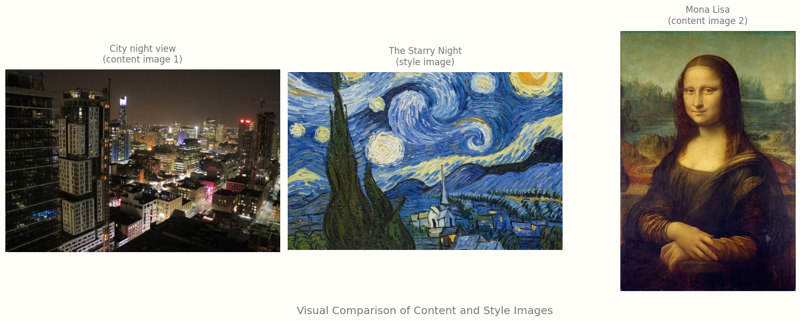

In [13]:
content_1 = load_image("../Images/city_night_view.jpg").to(device)
content_2 = load_image("../Images/Mona_Lisa.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg").to(device)

fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(figure_size[0], figure_size[1] / 3 * 2)
)

ax1.imshow(im_convert(content_1))
ax1.set_title("City night view\n(content image 1)", loc="center", pad=10)
ax1.axis("off")

ax2.imshow(im_convert(style))
ax2.set_title("The Starry Night\n(style image)", loc="center", pad=10)
ax2.axis("off")

ax3.imshow(im_convert(content_2))
ax3.set_title("Mona Lisa\n(content image 2)", loc="center", pad=10)
ax3.axis("off")

fig.suptitle(
    "Visual Comparison of Content and Style Images", fontsize="x-large", x=0.5, y=-0.02
)

plt.tight_layout()
plt.show()

In [14]:
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_transform = transforms.Compose(
        [
            transforms.Resize(size),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )

    image = in_transform(image).unsqueeze(0)

    return image


tabulation = Form_Generator()
tabulation.heading_printer(
    "Function definition to load and transform an image from a specified "
    "file path into a resizable and adjustable 4D tensor"
)

definitions = [
    """
def load_image(img_path, max_size=400, shape=None):
    image = Image.open(img_path).convert("RGB")

    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)

    if shape is not None:
        size = shape

    in_transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    image = in_transform(image).unsqueeze(0)

    return image
"""
]
tabulation.definition_generator(definitions)

Function definition to load and transform an image from a specified file path into a resizable and adjustable 4D tensor

    +----------------------------------------------------------+
    | Definition                                               |
    +----------------------------------------------------------+
    | def load_image(img_path, max_size=400, shape=None):      |
    |     image = Image.open(img_path).convert("RGB")          |
    |                                                          |
    |     if max(image.size) > max_size:                       |
    |         size = max_size                                  |
    |     else:                                                |
    |         size = max(image.size)                           |
    |                                                          |
    |     if shape is not None:                                |
    |         size = shape                                     |
    |                             

In [15]:
content = load_image("../Images/city_night_view.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg", shape=content.shape[-2:]).to(
    device
)

tabulation = Form_Generator()
tabulation.heading_printer("Reloading and transformation of content and style images")

statements = [
    """
content = load_image("../Images/city_night_view.jpg").to(device)
style = load_image("../Images/The_Starry_Night.jpg", shape=content.shape[-2:]).to(
    device
)
"""
]
tabulation.statement_generator(statements)

variables = ["content", "style"]
values = [str(reprlib_rules.repr(content.cpu())), str(reprlib_rules.repr(style.cpu()))]
tabulation.variable_generator(variables, values, 12)

expressions = ["content.shape", "style.shape"]
results = [str(content.shape), str(style.shape)]
tabulation.expression_generator(expressions, results)

Reloading and transformation of content and style images

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | content =                                                  |
    |     load_image("../Images/city_night_view.jpg").to(device) |
    | style = load_image("../Images/The_Starry_Night.jpg",       |
    |     shape=content.shape[-2:]).to(                          |
    |     device                                                 |
    | )                                                          |
    +------------------------------------------------------------+
    +----------+----------------------------------------------+
    | Variable | Value                                        |
    +----------+----------------------------------------------+
    | content  | tensor([[[[-0.7255, -0.7569, -0.7647,  ...,  |
    |          |

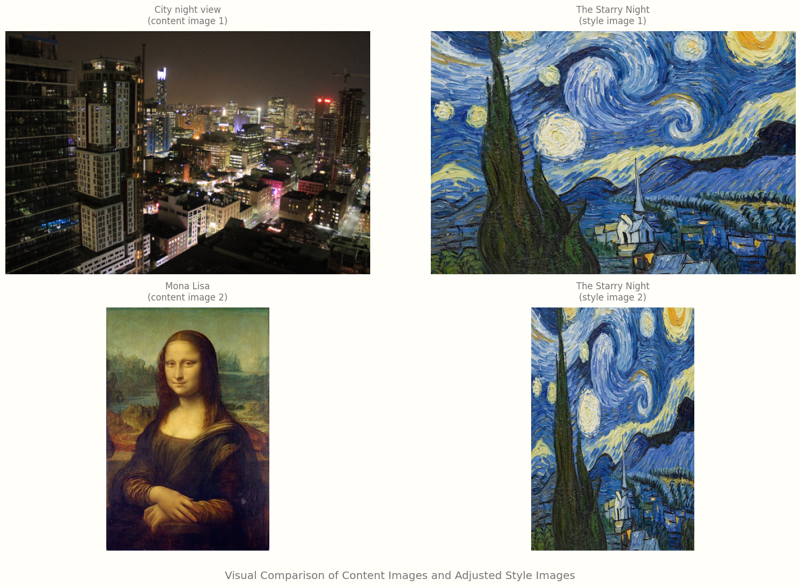

In [16]:
content_1 = load_image("../Images/city_night_view.jpg").to(device)
content_2 = load_image("../Images/Mona_Lisa.jpg").to(device)
style_1 = load_image("../Images/The_Starry_Night.jpg", shape=content.shape[-2:]).to(
    device
)
style_2 = load_image("../Images/The_Starry_Night.jpg", shape=content_2.shape[-2:]).to(
    device
)

plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1] / 5 * 6)

fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(im_convert(content_1))
axs[0, 0].set_title("City night view\n(content image 1)", loc="center", pad=10)

axs[0, 1].imshow(im_convert(style_1))
axs[0, 1].set_title("The Starry Night\n(style image 1)", loc="center", pad=10)

axs[1, 0].imshow(im_convert(content_2))
axs[1, 0].set_title("Mona Lisa\n(content image 2)", loc="center", pad=10)

axs[1, 1].imshow(im_convert(style_2))
axs[1, 1].set_title("The Starry Night\n(style image 2)", loc="center", pad=10)

for ax in axs.flat:
    ax.axis("off")

fig.suptitle(
    "Visual Comparison of Content Images and Adjusted Style Images",
    fontsize="x-large",
    x=0.5,
    y=-0.02,
)

plt.tight_layout()
plt.show()

## Feature Extraction


In [17]:
def get_features(image, model):
    layers = {
        "0": "conv1_1",
        "5": "conv2_1",
        "10": "conv3_1",
        "19": "conv4_1",
        "21": "conv4_2",
        "28": "conv5_1",
    }

    features = {}

    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image

    return features


tabulation = Form_Generator()
tabulation.heading_printer("Function definition to extract style and content features")

definitions = [
    """
def get_features(image, model):
    layers = {
        "0": "conv1_1",
        "5": "conv2_1",
        "10": "conv3_1",
        "19": "conv4_1",
        "21": "conv4_2",
        "28": "conv5_1"
    }

    features = {}

    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image

    return features
"""
]
tabulation.definition_generator(definitions)

Function definition to extract style and content features

    +------------------------------------------------+
    | Definition                                     |
    +------------------------------------------------+
    | def get_features(image, model):                |
    |     layers = {                                 |
    |         "0": "conv1_1",                        |
    |         "5": "conv2_1",                        |
    |         "10": "conv3_1",                       |
    |         "19": "conv4_1",                       |
    |         "21": "conv4_2",                       |
    |         "28": "conv5_1"                        |
    |     }                                          |
    |                                                |
    |     features = {}                              |
    |                                                |
    |     for name, layer in model._modules.items(): |
    |         image = layer(image)                   |
    | 

In [18]:
content_features = get_features(content, model)
style_features = get_features(style, model)

tabulation = Form_Generator()
tabulation.heading_printer("Feature extraction for content and style images")

statements = [
    """
content_features = get_features(content, model)
style_features = get_features(style, model)
"""
]
tabulation.statement_generator(statements)

variables = [
    "content_features",
    "style_features",
]
values = [
    str(
        reprlib_rules.repr(
            {
                key: reprlib_rules.repr(value.cpu())
                for key, value in content_features.items()
            }
        )
    ),
    str(
        reprlib_rules.repr(
            {
                key: reprlib_rules.repr(value.cpu())
                for key, value in style_features.items()
            }
        )
    ),
]
tabulation.variable_generator(variables, values, 1)

expressions = [
    "content_features.keys()",
    "len(content_features.keys())",
    "style_features.keys()",
    "len(style_features.keys())",
]
results = [
    str(content_features.keys()),
    str(len(content_features.keys())),
    str(style_features.keys()),
    str(len(style_features.keys())),
]
tabulation.expression_generator(expressions, results, 11)

Feature extraction for content and style images

    +-------------------------------------------------+
    | Statement                                       |
    +-------------------------------------------------+
    | content_features = get_features(content, model) |
    | style_features = get_features(style, model)     |
    +-------------------------------------------------+
    +------------------+----------------------------------------+
    | Variable         | Value                                  |
    +------------------+----------------------------------------+
    | content_features | {'conv1_1': 'tensor([[[[0...,          |
    |                  |  0.0000]]]])', 'conv2_1':              |
    |                  |  'tensor([[[[0..., 0.0000]]]])',       |
    |                  |  'conv3_1': 'tensor([[[[0...,          |
    |                  |  3.9621]]]])', 'conv4_1':              |
    |                  |  'tensor([[[[0..., 0.0000]]]])', ...}  |
    | style_features 

## The Gram Matrix


In [19]:
def gram_matrix(tensor):
    _, c, h, w = tensor.size()
    tensor = tensor.view(c, h * w)
    return torch.mm(tensor, tensor.t())


tabulation = Form_Generator()
tabulation.heading_printer("Function definition to create the gram matrix")

definitions = [
    """
def gram_matrix(tensor):
    _, c, h, w = tensor.size()
    tensor = tensor.view(c, h * w)
    return torch.mm(tensor, tensor.t())
"""
]
tabulation.definition_generator(definitions)

Function definition to create the gram matrix

    +-----------------------------------------+
    | Definition                              |
    +-----------------------------------------+
    | def gram_matrix(tensor):                |
    |     _, c, h, w = tensor.size()          |
    |     tensor = tensor.view(c, h * w)      |
    |     return torch.mm(tensor, tensor.t()) |
    +-----------------------------------------+


In [20]:
style_matrices = {layer: gram_matrix(style_features[layer]) for layer in style_features}

tabulation = Form_Generator()
tabulation.heading_printer(
    "Creation of the gram matrix dictionary for each layer of style features"
)

statements = [
    """
style_matrices = {
    layer: gram_matrix(style_features[layer])
    for layer in style_features
}
"""
]
tabulation.statement_generator(statements)

variables = ["style_matrices"]
values = [
    str(
        reprlib_rules.repr(
            {
                key: reprlib_rules.repr(value.cpu())
                for key, value in style_matrices.items()
            }
        )
    )
]
tabulation.variable_generator(variables, values, 1)

expressions = ["style_matrices.keys()", "len(style_matrices.keys())"]
results = [str(style_matrices.keys()), str(len(style_matrices.keys()))]
tabulation.expression_generator(expressions, results, 11)

Creation of the gram matrix dictionary for each layer of style features

    +-----------------------------------------------+
    | Statement                                     |
    +-----------------------------------------------+
    | style_matrices = {                            |
    |     layer: gram_matrix(style_features[layer]) |
    |     for layer in style_features               |
    | }                                             |
    +-----------------------------------------------+
    +----------------+---------------------------------------+
    | Variable       | Value                                 |
    +----------------+---------------------------------------+
    | style_matrices | {'conv1_1':                           |
    |                |  'tensor([[2.5...7.2001e+04]])',      |
    |                |  'conv2_1': 'tensor([[                |
    |                |  61...30449.2891]])', 'conv3_1':      |
    |                |  'tensor([[ 79...33167.6445]])'

In [21]:
style_weights = {
    "conv1_1": 1.0,
    "conv2_1": 0.75,
    "conv3_1": 0.2,
    "conv4_1": 0.2,
    "conv5_1": 0.2,
}

tabulation = Form_Generator()
tabulation.heading_printer("Initial weight settings for style features in each layer")

statements = [
    """
style_weights = {
    "conv1_1": 1.,
    "conv2_1": 0.75,
    "conv3_1": 0.2,
    "conv4_1": 0.2,
    "conv5_1": 0.2
}
"""
]
tabulation.statement_generator(statements)

variables = ["style_weights"]
values = [str(style_weights)]
tabulation.variable_generator(variables, values, 1)

expressions = ["style_weights.keys()", "len(style_weights.keys())"]
results = [str(style_weights.keys()), str(len(style_weights.keys()))]
tabulation.expression_generator(expressions, results, 11)

Initial weight settings for style features in each layer

    +----------------------+
    | Statement            |
    +----------------------+
    | style_weights = {    |
    |     "conv1_1": 1.,   |
    |     "conv2_1": 0.75, |
    |     "conv3_1": 0.2,  |
    |     "conv4_1": 0.2,  |
    |     "conv5_1": 0.2   |
    | }                    |
    +----------------------+
    +---------------+---------------------------------------------+
    | Variable      | Value                                       |
    +---------------+---------------------------------------------+
    | style_weights | {'conv1_1': 1.0, 'conv2_1': 0.75,           |
    |               |  'conv3_1': 0.2, 'conv4_1': 0.2, 'conv5_1': |
    |               |  0.2}                                       |
    +---------------+---------------------------------------------+
    +---------------------------+------------------------+
    | Expression                | Result                 |
    +------------------------

In [22]:
content_weight = 1
style_weight = 1e6

tabulation = Form_Generator()
tabulation.heading_printer(
    "Individual initial weight settings for content and style images"
)

statements = [
    """
content_weight = 1
style_weight = 1e6
"""
]
tabulation.statement_generator(statements)

variables = ["content_weight", "style_weight"]
values = [str(content_weight), str(style_weight)]
tabulation.variable_generator(variables, values)

Individual initial weight settings for content and style images

    +--------------------+
    | Statement          |
    +--------------------+
    | content_weight = 1 |
    | style_weight = 1e6 |
    +--------------------+
    +----------------+-----------+
    | Variable       | Value     |
    +----------------+-----------+
    | content_weight | 1         |
    | style_weight   | 1000000.0 |
    +----------------+-----------+


In [23]:
target = content.clone().requires_grad_(True).to(device)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of the target image")

statements = [
    """
target = content.clone().requires_grad_(True).to(device)
"""
]
tabulation.statement_generator(statements)

variables = ["target"]
values = [str(reprlib_rules.repr(target.cpu()))]
tabulation.variable_generator(variables, values, 12)

expressions = ["target.shape"]
results = [str(target.shape)]
tabulation.expression_generator(expressions, results)

Initialization of the target image

    +----------------------------------------------------------+
    | Statement                                                |
    +----------------------------------------------------------+
    | target = content.clone().requires_grad_(True).to(device) |
    +----------------------------------------------------------+
    +----------+---------------------------------------------+
    | Variable | Value                                       |
    +----------+---------------------------------------------+
    | target   | tensor([[[[-0.7255, -0.7569, -0.7647,  ..., |
    |          |             -0.7490, -0.7647, -0.7647],     |
    |          |           [-0.7333, -0.7490, -0.7255,  ..., |
    |          |             -0.7490...8745, -0.8510],       |
    |          |           [-0.5922, -0.6235, -0.7098,  ..., |
    |          |             -0.9686, -0.9451, -0.9373]]]],  |
    |          |        grad_fn=⟨ToCopyBackward0⟩)           |
    +----

## Optimization


In [24]:
optimizer = torch.optim.Adam([target], lr=0.003)

tabulation = Form_Generator()
tabulation.heading_printer("Initialization of optimizer by empirical observation")

statements = [
    """
optimizer = torch.optim.Adam([target], lr=0.003)
"""
]
tabulation.statement_generator(statements)

variables = ["optimizer"]
values = [str(optimizer)]
tabulation.variable_generator(variables, values)

Initialization of optimizer by empirical observation

    +--------------------------------------------------+
    | Statement                                        |
    +--------------------------------------------------+
    | optimizer = torch.optim.Adam([target], lr=0.003) |
    +--------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | optimizer | Adam (                    |
    |           | Parameter Group 0         |
    |           |     amsgrad: False        |
    |           |     betas: (0.9, 0.999)   |
    |           |     capturable: False     |
    |           |     differentiable: False |
    |           |     eps: 1e-08            |
    |           |     foreach: None         |
    |           |     fused: None           |
    |           |     lr: 0.003             |
    |           |     maximize: False       |
    |           |

In [25]:
epochs = 2100
show_every = 300

content_losses, style_losses, total_losses = [], [], []

dataframe = DataFrame_Generator("epoch", "content loss", "style loss", "total loss")

for epoch in range(1, epochs + 1):
    target_features = get_features(target, model)
    content_loss = torch.mean(
        (target_features["conv4_2"] - content_features["conv4_2"]) ** 2
    )
    style_loss = 0

    for layer in style_weights:
        target_feature = target_features[layer]
        target_matrix = gram_matrix(target_feature)
        style_matrix = style_matrices[layer]
        layer_style_loss = style_weights[layer] * torch.mean(
            (target_matrix - style_matrix) ** 2
        )
        _, c, h, w = target_feature.shape
        style_loss += layer_style_loss / (c * h * w)

    total_loss = content_weight * content_loss + style_weight * style_loss

    optimizer.zero_grad()
    # torch.mps.empty_cache()
    #   Releases all unoccupied cached memory currently held by the caching allocator so that
    #   those can be used in other GPU applications.
    torch.mps.empty_cache()
    total_loss.backward()
    optimizer.step()

    if epoch % show_every == 0:
        content_losses.append(content_loss.item())
        style_losses.append(style_loss.item())
        total_losses.append(total_loss.item())
        dataframe.updater(
            epoch, content_loss.item(), style_loss.item(), total_loss.item()
        )

tabulation = Form_Generator()
tabulation.heading_printer(
    "Optimization process of style transfer for a specific number of epochs"
)

statements = [
    """
epochs = 2100
show_every = 300

content_losses, style_losses, total_losses = [], [], []

for epoch in range(1, epochs + 1):
    target_features = get_features(target, model)
    content_loss = torch.mean(
        (target_features["conv4_2"] - content_features["conv4_2"])**2)
    style_loss = 0

    for layer in style_weights:
        target_feature = target_features[layer]
        target_matrix = gram_matrix(target_feature)
        style_matrix = style_matrices[layer]
        layer_style_loss = style_weights[layer] * torch.mean(
            (target_matrix - style_matrix)**2)
        _, c, h, w = target_feature.shape
        style_loss += layer_style_loss / (c * h * w)

    total_loss = content_weight * content_loss + style_weight * style_loss

    optimizer.zero_grad()
    torch.mps.empty_cache()
    total_loss.backward()
    optimizer.step()

    if epoch % show_every == 0:
        content_losses.append(content_loss.item())
        style_losses.append(style_loss.item())
        total_losses.append(total_loss.item())
"""
]
tabulation.statement_generator(statements)

variables = ["epochs", "show_every", "content_losses", "style_losses", "total_losses"]
values = [
    str(epochs),
    str(show_every),
    str(content_losses),
    str(style_losses),
    str(total_losses),
]
tabulation.variable_generator(variables, values, 1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Optimization process of style transfer for a specific number of epochs

    +---------------------------------------------------------+
    | Statement                                               |
    +---------------------------------------------------------+
    | epochs = 2100                                           |
    | show_every = 300                                        |
    |                                                         |
    | content_losses, style_losses, total_losses = [], [], [] |
    |                                                         |
    | for epoch in range(1, epochs + 1):                      |
    |     target_features = get_features(target, model)       |
    |     content_loss = torch.mean(                          |
    |         (target_features["conv4_2"] -                   |
    |     content_features["conv4_2"])**2)                    |
    |     style_loss = 0                                      |
    |                           

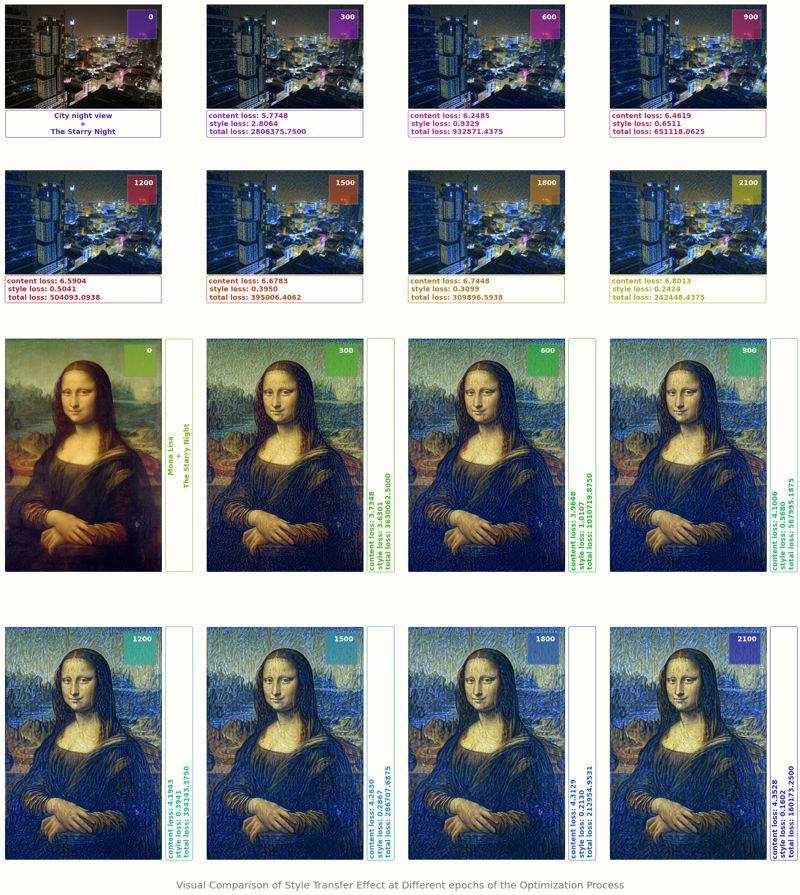

In [26]:
def style_transfer_iterations(
    model, target, content_features, style_matrices, epochs, show_every
):
    content_losses, style_losses, total_losses = [], [], []
    converted_targets = [im_convert(target)]

    for epoch in range(1, epochs + 1):
        target_features = get_features(target, model)
        content_loss = torch.mean(
            (target_features["conv4_2"] - content_features["conv4_2"]) ** 2
        )
        style_loss = 0

        for layer in style_weights:
            target_feature = target_features[layer]
            target_matrix = gram_matrix(target_feature)
            style_matrix = style_matrices[layer]
            layer_style_loss = style_weights[layer] * torch.mean(
                (target_matrix - style_matrix) ** 2
            )
            _, c, h, w = target_feature.shape
            style_loss += layer_style_loss / (c * h * w)

        total_loss = content_weight * content_loss + style_weight * style_loss

        optimizer.zero_grad()
        torch.mps.empty_cache()
        total_loss.backward()
        optimizer.step()

        if epoch % show_every == 0:
            content_losses.append(content_loss.item())
            style_losses.append(style_loss.item())
            total_losses.append(total_loss.item())
            converted_targets.append(im_convert(target))
    return content_losses, style_losses, total_losses, converted_targets


def corner_mark(
    text,
    ax,
    color,
    text_x=0.81,
    text_y=0.86,
    box_x=470,
    box_y=20,
    width=110,
    height=110,
    size="medium",
    fontweight="heavy",
    boxstyle="round, pad=0.3",
    zorder=0,
):
    ax.text(
        x=text_x,
        y=text_y,
        s=text,
        color=plt.rcParams["axes.facecolor"],
        rotation=0,
        size=size,
        fontweight=fontweight,
        transform=ax.transAxes,
        zorder=zorder + 2,
    )
    textbox = FancyBboxPatch(
        xy=(box_x, box_y),
        width=width,
        height=height,
        boxstyle=boxstyle,
        fc=color,
        ec="0.5",
        alpha=0.67,
        mutation_scale=1,
        mutation_aspect=1,
        zorder=zorder + 1,
    )
    ax.add_patch(textbox)
    image_shadow = Shadow(
        textbox,
        -0.5,
        +0.5,
        fc="none",
        ec="0.67",
        lw=1.5,
        transform=ax.transAxes,
        zorder=zorder,
    )
    ax.add_patch(image_shadow)


epochs = 2100
show_every = 300

target_1 = content_1.clone().requires_grad_(True).to(device)
content_features_1 = get_features(content_1, model)
style_features_1 = get_features(style_1, model)
style_matrices_1 = {
    layer: gram_matrix(style_features_1[layer]) for layer in style_features_1
}

target_2 = content_2.clone().requires_grad_(True).to(device)
content_features_2 = get_features(content_2, model)
style_features_2 = get_features(style_2, model)
style_matrices_2 = {
    layer: gram_matrix(style_features_2[layer]) for layer in style_features_2
}

model_1 = VGG19.to(device)
optimizer = torch.optim.Adam([target_1], lr=0.003)
(
    content_losses_1,
    style_losses_1,
    total_losses_1,
    converted_targets_1,
) = style_transfer_iterations(
    model_1, target_1, content_features_1, style_matrices_1, epochs, show_every
)

model_2 = VGG19.to(device)
optimizer = torch.optim.Adam([target_2], lr=0.003)
(
    content_losses_2,
    style_losses_2,
    total_losses_2,
    converted_targets_2,
) = style_transfer_iterations(
    model_2, target_2, content_features_2, style_matrices_2, epochs, show_every
)

colors = calm_color_generator(16)

fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2), constrained_layout=True)

gs = gridspec.GridSpec(
    nrows=4, ncols=4, figure=fig, wspace=0.08, hspace=0.08, height_ratios=[1, 1, 2, 2]
)

bbox_props = dict(
    boxstyle="round", fc=plt.rcParams["axes.facecolor"], ec="0.5", alpha=0.67
)

for idx in np.arange(16):
    ax = fig.add_subplot(gs[idx // 4, idx % 4], xticks=[], yticks=[], frameon=False)
    ax.set(xticks=[], yticks=[], frame_on=False)
    counter = str(show_every * (idx % 8))
    counter = counter.rjust(9 - len(counter))
    bbox_props["ec"] = colors[0]
    if idx < 8:
        ax.imshow(converted_targets_1[idx])
        corner_mark(counter, ax, colors[0])
        if idx == 0:
            title_1 = "City night view"
            title_1 = title_1.center(62 - len(title_1))
            title_2 = "+"
            title_2 = title_2.center(62 - len(title_2))
            title_3 = "The Starry Night"
            title_3 = title_3.center(62 - len(title_3))
            xlabel = title_1 + "\n" + title_2 + "\n" + title_3
        else:
            content_loss = r"content loss: {:.4f}".format(content_losses_1[idx - 1])
            content_loss = content_loss.ljust(70 - len(content_loss))
            style_loss = "style loss: {:.4f}".format(style_losses_1[idx - 1])
            style_loss = style_loss.ljust(70 - len(style_loss))
            total_loss = "total loss: {:.4f}".format(total_losses_1[idx - 1])
            total_loss = total_loss.ljust(70 - len(total_loss))
            xlabel = content_loss + "\n" + style_loss + "\n" + total_loss
        ax.set_xlabel(
            xlabel,
            loc="center",
            labelpad=5,
            color=colors.pop(0),
            fontweight="bold",
            bbox=bbox_props,
        )
    else:
        ax.imshow(converted_targets_2[idx % 8])
        ax.yaxis.set_label_position("right")
        corner_mark(
            counter,
            ax,
            colors[0],
            text_x=0.80,
            text_y=0.94,
            box_x=305,
            box_y=15,
            width=80,
            height=80,
        )
        if idx % 8 == 0:
            title_1 = "Mona Lisa"
            title_1 = title_1.center(94 - len(title_1))
            title_2 = "+"
            title_2 = title_2.center(94 - len(title_2))
            title_3 = "The Starry Night"
            title_3 = title_3.center(94 - len(title_3))
            ylabel = title_1 + "\n" + title_2 + "\n" + title_3
        else:
            content_loss = r"content loss: {:.4f}".format(content_losses_2[idx % 8 - 1])
            content_loss = content_loss.ljust(102 - len(content_loss))
            style_loss = "style loss: {:.4f}".format(style_losses_2[idx % 8 - 1])
            style_loss = style_loss.ljust(102 - len(style_loss))
            total_loss = "total loss: {:.4f}".format(total_losses_2[idx % 8 - 1])
            total_loss = total_loss.ljust(102 - len(total_loss))
            ylabel = content_loss + "\n" + style_loss + "\n" + total_loss
        ax.set_ylabel(
            ylabel,
            loc="center",
            labelpad=9,
            rotation=90,
            color=colors.pop(0),
            fontweight="bold",
            bbox=bbox_props,
        )
fig.suptitle(
    "Visual Comparison of Style Transfer Effect at Different epochs of "
    "the Optimization Process",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.show()

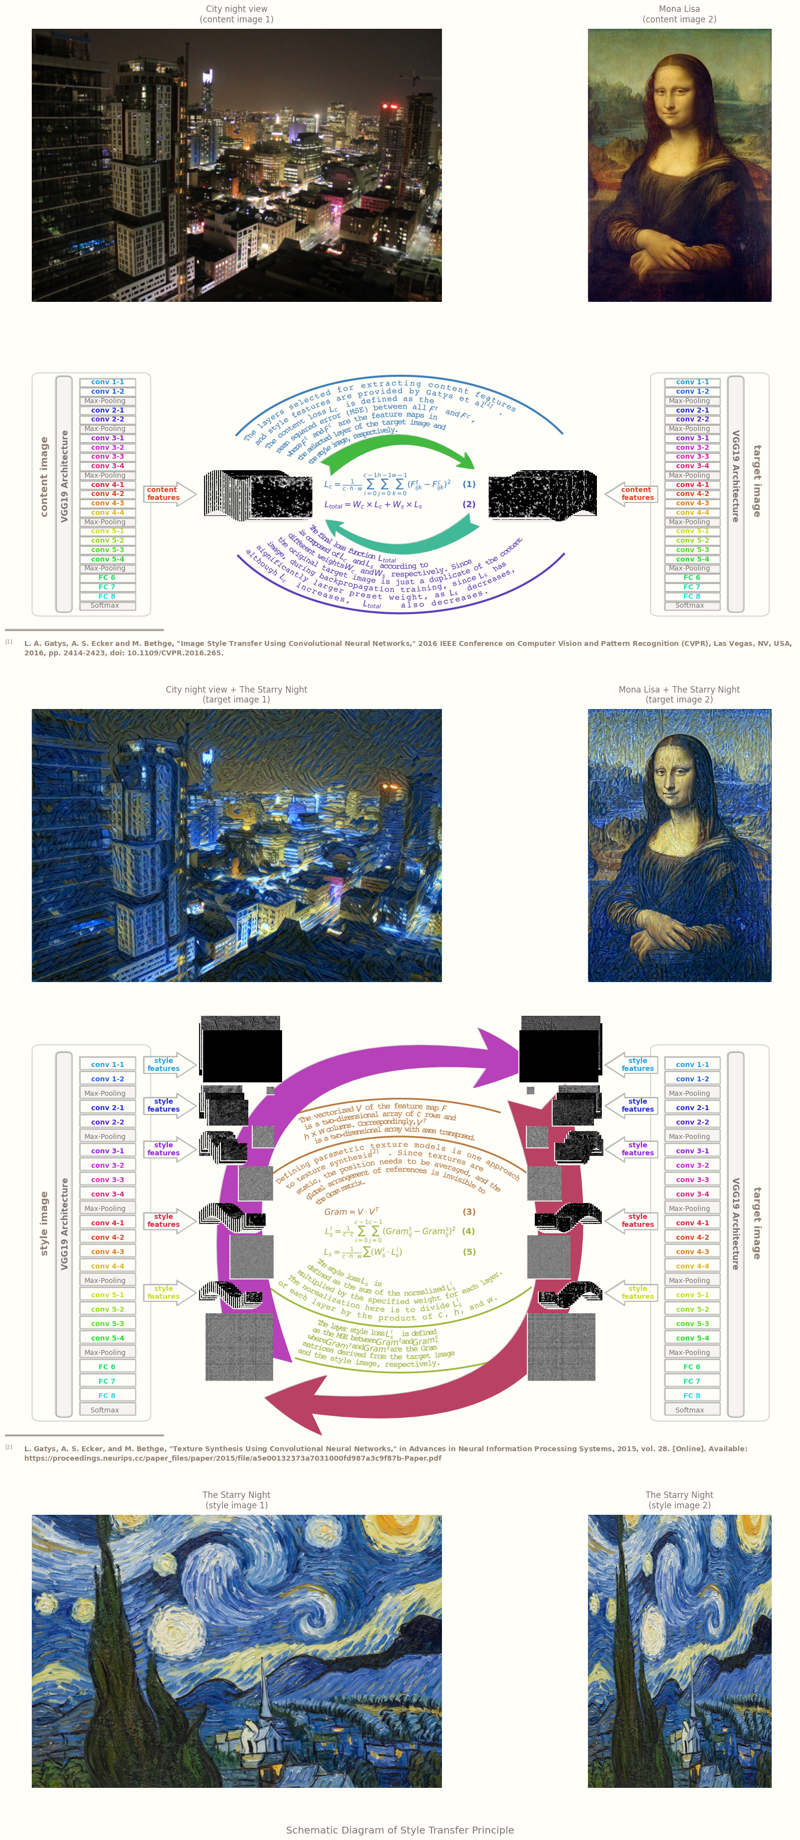

In [27]:
def vgg19_architecture(x, y, ax, feature_type, zorder=0, zoomer=1):
    global layer_colors
    try:
        colors = layer_colors
    except NameError:
        layer_colors = []
        colors = calm_color_generator(19)
    layer = 0
    for i in range(25):
        if i in [2, 5, 10, 15, 20, 24]:
            facecolor = plt.rcParams["axes.edgecolor"]
            color = plt.rcParams["text.color"]
            fontweight = "normal"
            if i == 24:
                text = "Softmax"
                text = text.center(20 - len(text))
            else:
                text = "Max-Pooling"
                text = text.center(22 - len(text))
        else:
            facecolor = plt.rcParams["axes.facecolor"]
            color = colors.pop(0)

            fontweight = "bold"
            text = VGG19_layers[layer]
            if layer in [16, 17, 18]:
                text = text.center(20 - len(text))
            else:
                text = text.center(21 - len(text))
            layer_colors.append(color)
            layer += 1
        ax.text(
            x,
            y + 1.5 * zoomer,
            text,
            color=color,
            size="medium",
            fontweight=fontweight,
            zorder=zorder + 8,
        )
        layer_box = FancyBboxPatch(
            xy=(x - 5, y - 3.75),
            width=70,
            height=16.25 * (1 + (zoomer - 1) * 2),
            boxstyle="square, pad=0",
            fc=facecolor,
            ec="0.5",
            alpha=0.67,
            mutation_scale=1,
            mutation_aspect=1,
            zorder=zorder + 7,
        )
        ax.add_patch(layer_box)
        shadow = Shadow(
            layer_box, -0.5, +0.5, fc="none", ec="0.67", lw=1.5, zorder=zorder + 6
        )
        ax.add_patch(shadow)
        if i != 24:
            y -= 18.75 * (1 + (zoomer - 1) * 2)
    title = "VGG19 Architecture".center(int(80 * (1 + (zoomer - 1) * 2)))
    if feature_type in ["content", "style"]:
        architecture_x = (x - 29, x - 35)
        image_x = (x - 55.5, x - 65)
        rotation = 90
    elif feature_type == "target":
        architecture_x = (x + 78, x + 75)
        image_x = (x + 105, x - 22.5)
        rotation = -90
    else:
        raise Exception("No expected feature type.")
    ax.text(
        x=architecture_x[0],
        y=y,
        s=title,
        rotation=rotation,
        color=plt.rcParams["text.color"],
        size="large",
        fontweight="heavy",
        zorder=zorder + 5,
    )
    architecture_box = FancyBboxPatch(
        xy=(architecture_x[1], y - 8.125),
        width=20,
        height=475 * (1 + (zoomer - 1) * 2),
        boxstyle="round, pad=0, rounding_size=7",
        fc=plt.rcParams["axes.edgecolor"],
        ec="0.5",
        alpha=0.67,
        mutation_scale=1,
        mutation_aspect=1,
        zorder=zorder + 4,
    )
    ax.add_patch(architecture_box)
    architecture_shadow = Shadow(
        architecture_box, -0.5, +0.5, fc="none", ec="0.67", lw=3, zorder=zorder + 3
    )
    ax.add_patch(architecture_shadow)
    if feature_type == "content":
        frame_name = "content image".center(
            int(74 * (1 + (zoomer - 1) * 2)) - len(feature_type)
        )
    elif feature_type == "style":
        frame_name = "style image".center(
            int(73 * (1 + (zoomer - 1) * 2)) - len(feature_type)
        )
    elif feature_type == "target":
        frame_name = "target image".center(
            int(72 * (1 + (zoomer - 1) * 2)) - len(feature_type)
        )
    else:
        raise Exception("No expected feature type.")
    ax.text(
        x=image_x[0],
        y=y,
        s=frame_name,
        rotation=rotation,
        color=plt.rcParams["legend.edgecolor"],
        size="x-large",
        fontweight="heavy",
        zorder=zorder + 2,
    )
    background_box = FancyBboxPatch(
        xy=(image_x[1], y - 16.5),
        width=150,
        height=490 * (1 + (zoomer - 1) * 2),
        boxstyle="round, pad=0, rounding_size=11",
        fc=plt.rcParams["axes.facecolor"],
        ec="0.5",
        alpha=0.67,
        mutation_scale=1,
        mutation_aspect=1,
        zorder=zorder + 1,
    )
    background_box.set_alpha(0)
    ax.add_patch(background_box)
    image_shadow = Shadow(
        background_box, -0.5, +0.5, fc="none", ec="0.67", lw=1.5, zorder=zorder
    )
    ax.add_patch(image_shadow)
    return layer_colors


def feature_arrow(
    x,
    y,
    ax,
    feature_type,
    color,
    size="medium",
    fontweight="bold",
    boxstyle="rarrow, pad=0",
    width=50,
    height=32.5,
    zorder=10,
):
    if feature_type == "content":
        feature_type = feature_type.center(15 - len(feature_type))
    elif feature_type == "style":
        feature_type = feature_type.center(17 - len(feature_type))
    else:
        raise Exception("No expected feature type.")
    title = feature_type + "\nfeatures".center(16 - len("features"))
    ax.text(
        x=x,
        y=y,
        s=title,
        color=color,
        rotation=0,
        size=size,
        fontweight=fontweight,
        zorder=zorder + 2,
    )
    arrow = FancyBboxPatch(
        xy=(x - 4, y - 6),
        width=width,
        height=height,
        boxstyle=boxstyle,
        fc=plt.rcParams["axes.facecolor"],
        ec="0.5",
        alpha=0.67,
        mutation_scale=1,
        mutation_aspect=1,
        zorder=zorder + 1,
    )
    ax.add_patch(arrow)
    shadow = Shadow(arrow, -0.5, +0.5, fc="none", ec="0.67", lw=2, zorder=zorder)
    ax.add_patch(shadow)


def grayscale_im_convert(tensor, channel):
    def tensor_to_image(tensor, channel):
        transform = transforms.ToPILImage()
        tensor = tensor.squeeze(0)[channel]
        return transform(tensor)

    def grayscale_image(image):
        transform = transforms.Grayscale()
        return transform(image)

    def grayscale_image_conversion(image):
        transform = transforms.Compose(
            [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
        )
        return transform(image)

    image = tensor_to_image(tensor, channel)
    image = grayscale_image(image)
    tensor = grayscale_image_conversion(image).permute(1, 2, 0)
    array = tensor.cpu().clone().detach().numpy()
    array = array.reshape(array.shape[0], -1)
    array = array * 0.5 + 0.5
    array = array.clip(0, 1)
    return array


def display_layer_images(x, y, ax, feature_type, layer_name, limit):
    feature_dict = dict(
        [
            ("content", content_features),
            ("style", style_features),
            ("target", target_features),
        ]
    )
    layer = feature_dict[feature_type][layer_name]
    n = float(layer_name.split("_")[0].split("conv")[-1])
    c, h, w = layer.squeeze().shape
    y_position = np.linspace(0, 1, c // 20, endpoint=False)
    y_position = np.sin(y_position * 2 * np.pi) * 0.02
    for i in range(c // 20):
        if feature_type in ["content", "style"]:
            axins = ax.inset_axes(
                [x + i * 0.0025, y + y_position[i], limit / w * h / n, limit / n]
            )
        elif feature_type == "target":
            axins = ax.inset_axes(
                [x - i * 0.0025, y + y_position[i], limit / w * h / n, limit / n]
            )
        else:
            raise Exception("No expected feature type.")
        axins.imshow(grayscale_im_convert(layer, i), cmap="binary_r")
        axins.set(xticks=[], yticks=[], frame_on=True)
        for spine in axins.spines.values():
            spine.set_edgecolor(plt.rcParams["axes.edgecolor"])
            spine.set_linewidth(1.5)


def arc_arrow(
    x, y, ax, radius, rotation, color, connectionstyle, style="fancy", zorder=0
):
    x1, x2 = (
        x - radius * np.cos(rotation * np.pi / 180),
        x + radius * np.cos(rotation * np.pi / 180),
    )
    y1, y2 = (
        y - radius * np.sin(rotation * np.pi / 180),
        y + radius * np.sin(rotation * np.pi / 180),
    )
    arrowstyle = f"{style}, head_width={radius / 4}, head_length={radius / 4}, tail_width={radius / 4}"
    arc_arrow = FancyArrowPatch(
        (x1, y1),
        (x2, y2),
        arrowstyle=arrowstyle,
        color=color,
        connectionstyle=connectionstyle,
        zorder=zorder + 1,
    )
    ax.add_patch(arc_arrow)
    shadow = Shadow(arc_arrow, -0.5, +0.5, fc="none", ec="0.67", lw=2, zorder=zorder)
    ax.add_patch(shadow)


def curved_text(
    x,
    y,
    ax,
    radius,
    rotation,
    color,
    ratio=2,
    text=" ",
    length=120,
    interval=0.12,
    clockwise=True,
    fontsize="large",
    fontweight="bold",
    zorder=0,
):
    def coordinate_information(x, y):
        x_list = [
            x
            + radius
            * np.cos((180 - (angle + (90 - length // ratio) + rotation)) * np.pi / 180)
            for angle in np.arange(0, length, 1)
        ]
        y_list = [
            y
            + radius
            * np.sin((180 - (angle + (90 - length // ratio) + rotation)) * np.pi / 180)
            for angle in np.arange(0, length, 1)
        ]
        angle_list = [
            90 - (angle + (90 - length // ratio) + rotation)
            for angle in np.arange(0, length, 1)
        ]
        return x_list, y_list, angle_list

    def character_display(line):
        mark = "end"
        omission = 0
        total_omission = 0
        position = 0
        slash_switch = "off"
        for i in range(len(line)):
            if line[i] == "$" and mark == "end":
                mark = "start"
                latex = "$"
                omission += 1
                continue
            elif line[i] == "$" and mark == "start":
                if slash_switch == "on":
                    slash_switch = "off"
                else:
                    omission += 1
                mark = "end"
                latex += line[i]
                text = latex
                total_omission += omission
                position = (
                    i
                    - total_omission
                    - round((len(text) - omission) / 2)
                    + round((len(text) - omission) / 2) // 4
                )
                omission = 0
            elif line[i] != "$" and mark == "start":
                latex += line[i]
                if slash_switch == "off":
                    if line[i] in ["_", "^", "{", "}"]:
                        omission += 1
                    elif line[i] == "\\":
                        omission += 1
                        slash_switch = "on"
                else:
                    if line[i] in ["{", "}"]:
                        omission += 1
                        slash_switch = "off"
                    elif line[i] == " ":
                        slash_switch = "off"
                    else:
                        omission += 1
                continue
            else:
                text = line[i]
                position = i - total_omission
            position_angle = i - total_omission
            ax.text(
                x=x_list[position],
                y=y_list[position],
                s=text,
                horizontalalignment="center",
                verticalalignment="center",
                rotation=angle_list[position_angle],
                color=color,
                size=fontsize,
                fontweight=fontweight,
                zorder=zorder + 1,
                fontname=["Courier"],
                path_effects=[
                    path_effects.withSimplePatchShadow(
                        offset=(-0.5, +0.5), shadow_rgbFace="0.67"
                    )
                ],
            )

    max_length = len(max(text.split("\\\n"), key=len))
    if max_length > length // ratio:
        raise Exception(
            "For better rendering, please adjust the maximum string length."
        )
    interval = interval * radius

    if clockwise == True:
        for line in text.split("\\\n")[::-1]:
            x_list, y_list, angle_list = coordinate_information(x, y)
            x_list = x_list[:: length // max_length]
            y_list = y_list[:: length // max_length]
            angle_list = angle_list[:: length // max_length]
            radius += interval
            character_display(line)

        x_list, y_list = coordinate_information(x, y)[:2]
    else:
        for line in text.split("\\\n"):
            x_list, y_list, angle_list = coordinate_information(x, y)
            x_list = x_list[:: -(length // max_length)]
            y_list = y_list[:: -(length // max_length)]
            angle_list = angle_list[:: -(length // max_length)]
            angle_list = np.add(angle_list, 180)
            radius += interval
            character_display(line)

        x_list, y_list = coordinate_information(x, y)[:2]
        x_list.reverse()
        y_list.reverse()
    ax.plot(
        x_list,
        y_list,
        color=color,
        linewidth=length / 20 / ratio,
        zorder=zorder,
        path_effects=[
            path_effects.SimpleLineShadow(
                shadow_color="0.67", offset=(-0.5, +0.5), linewidth=length / 200
            ),
            path_effects.Normal(),
        ],
    )


def latex_formula(
    x,
    y,
    ax,
    color,
    text,
    text_length=30,
    rotation=0,
    fontsize="large",
    fontweight="heavy",
    zorder=0,
):
    global formula_counter
    formula_counter += 1
    text = text.ljust(text_length)
    counter = f"({formula_counter})".rjust(5)
    string = text + counter
    ax.text(
        x=x,
        y=y,
        s=string,
        horizontalalignment="center",
        verticalalignment="center",
        rotation=rotation,
        color=color,
        size=fontsize,
        fontweight=fontweight,
        zorder=zorder,
        path_effects=[
            path_effects.withSimplePatchShadow(
                offset=(-0.5, +0.5), shadow_rgbFace="0.67"
            )
        ],
    )


def add_footnote(ax, footnotes, size="medium", fontweight="bold", zorder=0):
    global footnote_counter
    new_items = []
    for item in footnotes:
        footnote_counter += 1
        separate_item = item.split("\n")
        separate_item = [
            " " * 8 + separate_item[i]
            if i != 0
            else r"$^{[%s]}$" % footnote_counter + " " * 5 + separate_item[i]
            for i in range(len(separate_item))
        ]
        new_item = "\n".join(separate_item)
        new_items.append(new_item)
    new_footnotes = "\n".join(new_items)
    ax.set_xlabel(
        new_footnotes,
        loc="left",
        labelpad=10,
        color=plt.rcParams["legend.edgecolor"],
        size=size,
        fontweight=fontweight,
    )
    textbox = FancyBboxPatch(
        xy=(ax.get_xlim()[0], ax.get_ylim()[0]),
        width=ax.get_xlim()[1] / 5,
        height=ax.get_ylim()[1] / 200,
        boxstyle="square, pad=0.3",
        fc=plt.rcParams["legend.edgecolor"],
        ec=plt.rcParams["legend.edgecolor"],
        alpha=0.67,
        mutation_scale=1,
        mutation_aspect=1,
        zorder=zorder + 1,
    )
    ax.add_patch(textbox)
    image_shadow = Shadow(
        textbox, -0.5, +0.5, fc="none", ec="0.67", lw=1.5, zorder=zorder
    )
    ax.add_patch(image_shadow)


def display_gram_matrix(x, y, ax, feature_type, layer_name, limit):
    feature_dict = dict([("style", style_features), ("target", target_features)])
    layer = feature_dict[feature_type][layer_name]
    if feature_type == "style":
        matrix = style_matrices[layer_name].cpu().unsqueeze(0).unsqueeze(0)
    elif feature_type == "target":
        matrix = gram_matrix(layer).cpu().unsqueeze(0).unsqueeze(0)
    else:
        raise Exception("No expected feature type.")
    n = float(layer_name.split("_")[0].split("conv")[-1])
    c, h, w = layer.squeeze().shape
    axins = ax.inset_axes(
        [x, y, limit / np.sqrt(c) * np.square(n), limit / np.sqrt(c) * np.square(n)]
    )
    axins.imshow(grayscale_im_convert(matrix, 0), cmap="binary_r")
    axins.set(xticks=[], yticks=[], frame_on=True)
    for spine in axins.spines.values():
        spine.set_edgecolor(plt.rcParams["axes.edgecolor"])
        spine.set_linewidth(1.5)


target_features = get_features(target, model)

colors = calm_color_generator(8)

formula_counter, footnote_counter = 0, 0

fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 4), constrained_layout=True)

gs = gridspec.GridSpec(
    nrows=5,
    ncols=2,
    figure=fig,
    wspace=0.08,
    hspace=0.08,
    width_ratios=[2, 1],
    height_ratios=[2, 2, 2, 3, 2],
)

content_images = ["City night view\n(content image 1)", "Mona Lisa\n(content image 2)"]

style_images = [
    "The Starry Night\n(style image 1)",
    "The Starry Night\n(style image 2)",
]

VGG19_layers = [
    "conv 1-1",
    "conv 1-2",
    "conv 2-1",
    "conv 2-2",
    "conv 3-1",
    "conv 3-2",
    "conv 3-3",
    "conv 3-4",
    "conv 4-1",
    "conv 4-2",
    "conv 4-3",
    "conv 4-4",
    "conv 5-1",
    "conv 5-2",
    "conv 5-3",
    "conv 5-4",
    "FC 6",
    "FC 7",
    "FC 8",
]

for idx in np.arange(10):
    ax = fig.add_subplot(gs[idx // 2, idx % 2], xticks=[], yticks=[], frameon=False)
    ax.set(xticks=[], yticks=[], frame_on=False)
    if idx // 2 == 0:
        exec(f"ax.imshow(im_convert(content_{idx % 2 + 1}))")
        ax.set_title(content_images[idx % 2], loc="center", pad=10)

    elif idx // 2 == 4:
        exec(f"ax.imshow(im_convert(style_{idx % 2 + 1}))")
        ax.set_title(style_images[idx % 2], loc="center", pad=10)

    elif idx // 2 == 2:
        exec(f"ax.imshow(converted_targets_{idx % 2 + 1}[-1])")
        title_1 = content_images[idx % 2].split("\n")[0].strip()
        title_2 = style_images[idx % 2].split("\n")[0].strip()
        title = f"{title_1} + {title_2}" + f"\n(target image {idx % 2 + 1})"
        ax.set_title(title, loc="center", pad=10)
    else:
        ax.remove()

axbig_1 = fig.add_subplot(gs[1, :])
axbig_1.set(xlim=(0, 1000), ylim=(-25, 525), xticks=[], yticks=[])
axbig_1.spines[["top", "bottom", "left", "right"]].set_visible(False)

layer_colors = vgg19_architecture(100, 471, axbig_1, "content")
feature_arrow(180, 240, axbig_1, "content", layer_colors[9])

display_layer_images(0.24, 0.42, axbig_1, "content", "conv4_2", 0.6)

vgg19_architecture(840, 471, axbig_1, "target")
feature_arrow(780, 240, axbig_1, "content", layer_colors[9], boxstyle="larrow, pad=0")

display_layer_images(0.66, 0.42, axbig_1, "target", "conv4_2", 0.6)

curved_1 = r"The layers selected for extracting content features\
and style features are provided by Gatys et al$^{[1]}$.\
The content loss $L_{c}$ is defined as the\
mean squared error (MSE) between all $F^{t}$ and $F^{c}$,\
where $F^{t}$ and $F^{c}$ are the feature maps in\
the selected layer of the target image and\
the style image, respectively."

curved_2 = r"The final loss function $L_{total}$\
is composed of $L_{c}$ and $L_{s}$ according to\
different weights $W_{c}$ and $W_{s}$ respectively. Since\
the original target image is just a duplicate of the content\
image, during backpropagation training, since $L_{s}$ has\
significantly larger preset weight, as $L_{s}$ decreases,\
although $L_{c}$ increases, $L_{total}$ also decreases."

formula_1 = (
    r"${L}_{c}=\frac{1}{c\cdot h\cdot w}\sum_{i=0}^{c-1}"
    + r"\sum_{j=0}^{h-1}\sum_{k=0}^{w-1}(F^{t}_{ijk}-F^{c}_{ijk})^{2}$"
)
formula_2 = r"${L}_{total}={W}_{c}\times{L}_{c}+{W}_{s}\times{L}_{s}$"

footnote_1 = [
    'L. A. Gatys, A. S. Ecker and M. Bethge, "Image Style Transfer '
    'Using Convolutional Neural Networks," 2016 IEEE Conference on '
    "Computer Vision and Pattern Recognition (CVPR), Las Vegas, NV, "
    "USA, \n2016, pp. 2414-2423, doi: 10.1109/CVPR.2016.265."
]

arc_arrow(500, 300, axbig_1, 95, 0, colors.pop(0), "arc3, rad=-0.4")
arc_arrow(500, 200, axbig_1, 95, 180, colors.pop(0), "arc3, rad=-0.4")

curved_text(500, 250, axbig_1, 130, 0, colors[0], text=curved_1)
latex_formula(500, 270, axbig_1, colors.pop(0), formula_1, text_length=114)

curved_text(500, 250, axbig_1, 130, 180, colors[0], clockwise=False, text=curved_2)
latex_formula(500, 230, axbig_1, colors.pop(0), formula_2, text_length=67)

add_footnote(axbig_1, footnote_1)

axbig_2 = fig.add_subplot(gs[3, :])
axbig_2.set(xlim=(0, 1000), ylim=(-250, 550), xticks=[], yticks=[])
axbig_2.spines[["top", "bottom", "left", "right"]].set_visible(False)

vgg19_architecture(100, 471, axbig_2, "style", zoomer=1.25)
feature_arrow(180, 465, axbig_2, "style", layer_colors[0])
feature_arrow(180, 385, axbig_2, "style", layer_colors[2])
feature_arrow(180, 300, axbig_2, "style", layer_colors[4])
feature_arrow(180, 160, axbig_2, "style", layer_colors[8])
feature_arrow(180, 20, axbig_2, "style", layer_colors[12])

display_layer_images(0.245, 0.870, axbig_2, "style", "conv1_1", 0.15)
display_layer_images(0.245, 0.770, axbig_2, "style", "conv2_1", 0.15)
display_layer_images(0.245, 0.680, axbig_2, "style", "conv3_1", 0.15)
display_layer_images(0.245, 0.515, axbig_2, "style", "conv4_1", 0.15)
display_layer_images(0.245, 0.330, axbig_2, "style", "conv5_1", 0.15)

display_gram_matrix(0.326, 0.835, axbig_2, "style", "conv1_1", 0.15)
display_gram_matrix(0.300, 0.705, axbig_2, "style", "conv2_1", 0.15)
display_gram_matrix(0.275, 0.575, axbig_2, "style", "conv3_1", 0.15)
display_gram_matrix(0.259, 0.385, axbig_2, "style", "conv4_1", 0.15)
display_gram_matrix(0.213, 0.135, axbig_2, "style", "conv5_1", 0.15)

vgg19_architecture(840, 471, axbig_2, "target", zoomer=1.25)
feature_arrow(780, 465, axbig_2, "style", layer_colors[0], boxstyle="larrow, pad=0")
feature_arrow(780, 385, axbig_2, "style", layer_colors[2], boxstyle="larrow, pad=0")
feature_arrow(780, 300, axbig_2, "style", layer_colors[4], boxstyle="larrow, pad=0")
feature_arrow(780, 160, axbig_2, "style", layer_colors[8], boxstyle="larrow, pad=0")
feature_arrow(780, 20, axbig_2, "style", layer_colors[12], boxstyle="larrow, pad=0")
display_layer_images(0.655, 0.870, axbig_2, "target", "conv1_1", 0.15)
display_layer_images(0.705, 0.770, axbig_2, "target", "conv2_1", 0.15)
display_layer_images(0.723, 0.680, axbig_2, "target", "conv3_1", 0.15)
display_layer_images(0.730, 0.515, axbig_2, "target", "conv4_1", 0.15)
display_layer_images(0.735, 0.330, axbig_2, "target", "conv5_1", 0.15)

display_gram_matrix(0.655, 0.835, axbig_2, "target", "conv1_1", 0.15)
display_gram_matrix(0.647, 0.705, axbig_2, "target", "conv2_1", 0.15)
display_gram_matrix(0.640, 0.575, axbig_2, "target", "conv3_1", 0.15)
display_gram_matrix(0.635, 0.385, axbig_2, "target", "conv4_1", 0.15)
display_gram_matrix(0.621, 0.135, axbig_2, "target", "conv5_1", 0.15)

curved_3 = r"Defining parametric texture models is one approach\
to texture synthesis$^{[2]}$. Since textures are\
static, the position needs to be averaged, and the\
global arrangement of references is invisible to\
the Gram matrix."

curved_4 = r"The vectorized $V$ of the feature map $F$\
is a two-dimensional array of $c$ rows and\
$h \times w$ columns. Correspondingly, ${V}^{T}$\
is a two-dimensional array with axes transposed."

curved_5 = r"The style loss $L_{s}$ is\
defined as the sum of the normalized ${L}^{l}_{s}$\
multiplied by the specified weight for each layer.\
The normalization here is to divide ${L}^{l}_{s}$\
of each layer by the product of $c$, $h$, and $w$."

curved_6 = r"The layer style loss ${L}^{l}_{s}$ is defined\
as the MSE between ${Gram}^{t}$ and ${Gram}^{s}$,\
where ${Gram}^{t}$ and ${Gram}^{s}$ are the Gram\
matrices derived from the target image\
and the style image, respectively."

formula_3 = r"$Gram=V\cdot{V}^{T}$"
formula_4 = (
    r"${L}^{l}_{s}=\frac{1}{c\cdot c}\sum_{i=0}^{c-1}"
    + r"\sum_{j=0}^{c-1}({Gram}^{t}_{ij}-{Gram}^{s}_{ij})^{2}$"
)
formula_5 = r"${L}_{s}=\frac{1}{c\cdot h\cdot w}\sum({W}^{l}_{s}\cdot{L}^{l}_{s})$"

footnote_2 = [
    'L. Gatys, A. S. Ecker, and M. Bethge, "Texture Synthesis Using '
    'Convolutional Neural Networks," in Advances in Neural '
    "Information Processing Systems, 2015, vol. 28. [Online]. "
    "Available: \nhttps://proceedings.neurips.cc/paper_files/paper/"
    "2015/file/a5e00132373a7031000fd987a3c9f87b-Paper.pdf"
]

arc_arrow(500, 175, axbig_2, 345, 60, colors.pop(0), "arc3, rad=-.8")
arc_arrow(500, 125, axbig_2, 345, 240, colors.pop(0), "arc3, rad=-.8")

curved_text(500, 120, axbig_2, 135, 0, colors[0], text=curved_3, length=100)
curved_text(
    500,
    100,
    axbig_2,
    250,
    25,
    colors[0],
    text=curved_4,
    length=50,
    interval=0.06,
    ratio=1,
)
latex_formula(500, 190, axbig_2, colors.pop(0), formula_3, text_length=47)

curved_text(
    500, 180, axbig_2, 135, 180, colors[0], clockwise=False, text=curved_5, length=100
)
curved_text(
    500,
    200,
    axbig_2,
    250,
    205,
    colors[0],
    clockwise=False,
    text=curved_6,
    length=50,
    interval=0.06,
    ratio=1,
)
latex_formula(500, 150, axbig_2, colors[0], formula_4, text_length=101)
latex_formula(500, 110, axbig_2, colors.pop(0), formula_5, text_length=87)

add_footnote(axbig_2, footnote_2)

fig.suptitle(
    "Schematic Diagram of Style Transfer Principle", fontsize="x-large", x=0.5, y=-0.02
)

plt.show()